In [11]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import plotly.graph_objs as go

## Multivariable linear regression

### Generate data

In [12]:
a, b, c = 2.0, 3.0, 1.5
num_points = 100
X1 = np.random.uniform(0, 50, num_points)
X2 = np.random.uniform(0, 50, num_points)
y = a * X1 + b* X2 +c +np.random.randn(100)*15
X = np.column_stack((X1, X2))

### Plot data

In [13]:
# Create a trace for the 3D scatter plot of random points
scatter = go.Scatter3d(
    x=X1,
    y=X2,
    z=y,
    mode='markers',
    marker=dict(
        size=5,
        opacity=0.7,
        color='blue'  
    ),
    name='Random Points'
)


# Create a layout for the 3D plot
layout = go.Layout(
    scene=dict(
        xaxis=dict(title='X1'),
        yaxis=dict(title='X2'),
        zaxis=dict(title='y'),
    ),
)

# Create a figure and add both traces (random points and predicted plane) to it
fig = go.Figure(data=[scatter], layout=layout)

# Show the interactive 3D plot
fig.show()

### Split the data and fit a model 

In [14]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [15]:
y_pred = model.predict(X_test)
print("MAE = ", mean_absolute_error(y_pred, y_test))
print("MSE = ", mean_squared_error(y_pred, y_test))
print("r2_score = ", r2_score(y_pred, y_test))

MAE =  9.32427447468872
MSE =  130.5960265285815
r2_score =  0.954188489429958


### Residual plots

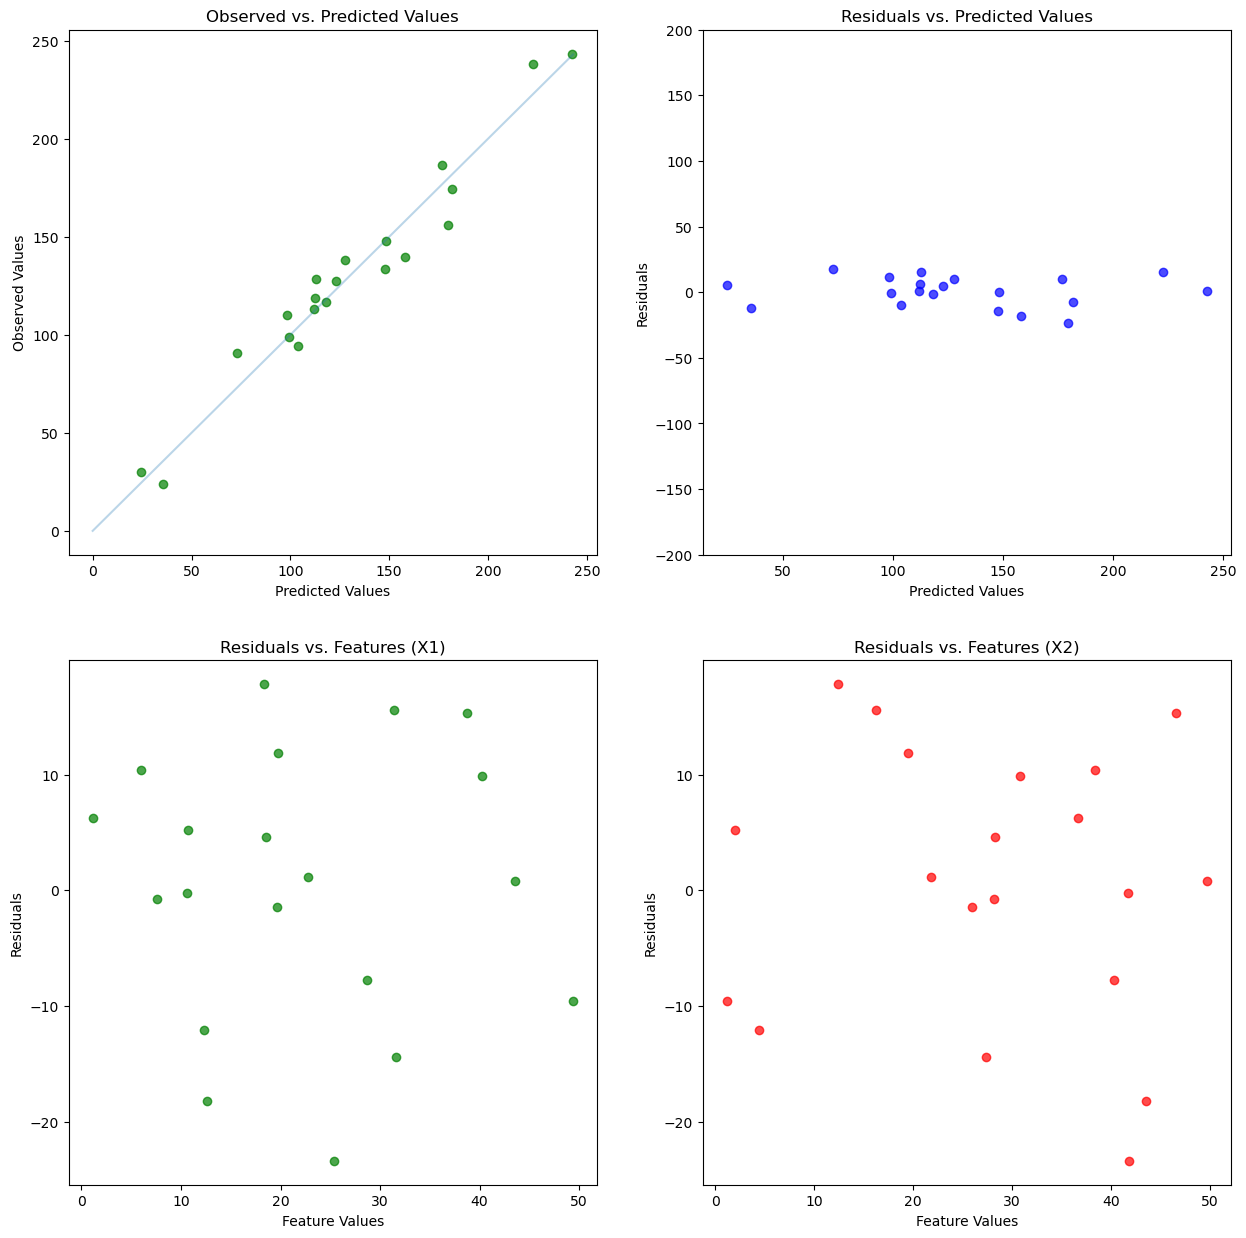

In [16]:
residuals = y_test - y_pred
plt.figure(figsize=(15, 15))

# Observed vs. Predicted Plot

plt.subplot(2,2,1)
plt.scatter(y_pred, y_test, color = "green", alpha = 0.7)
plt.plot(np.linspace(0, int(y_test.max())), np.linspace(0, int(y_test.max())), alpha= 0.3)
plt.xlabel('Predicted Values')
plt.ylabel('Observed Values')
plt.title('Observed vs. Predicted Values')
# Residuals vs. Predicted Values
ax2= plt.subplot(2, 2, 2)
plt.scatter(y_pred, residuals, c='blue', alpha=0.7)
ax2.set_ylim(-200, 200)
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Residuals vs. Predicted Values')

# Residuals vs. Features (X1)
plt.subplot(2, 2, 3)
plt.scatter(X_test[:,0], residuals, c='green', alpha=0.7)
plt.xlabel('Feature Values')
plt.ylabel('Residuals')
plt.title('Residuals vs. Features (X1)')

# Residuals vs. Features (X2)
plt.subplot(2, 2, 4)
plt.scatter(X_test[:,1], residuals, c='red', alpha=0.7)
plt.xlabel('Feature Values')
plt.ylabel('Residuals')
plt.title('Residuals vs. Features (X2)')

plt.show()

### Plot the predection plan

In [17]:
# Create a trace for the 3D scatter plot of random points
scatter = go.Scatter3d(
    x=X_train[:, 0],
    y=X_train[:, 1],
    z=y_train,
    mode='markers',
    marker=dict(
        size=5,
        opacity=0.7,
        color='blue'  # You can specify a color for the points
    ),
    name='Random Points'
)


# Create a grid of X1 and X2 values for predictions
X1_range = np.linspace(min(X_train[:, 0]), max(X_train[:, 0]), 100)
X2_range = np.linspace(min(X_train[:, 1]), max(X_train[:, 1]), 100)
X1_grid, X2_grid = np.meshgrid(X1_range, X2_range)
feature_space = np.column_stack((X1_grid.ravel(), X2_grid.ravel()))

# Predict the target variable (Y_pred) using the linear regression model
Y_pred = model.predict(feature_space)
Y_pred = Y_pred.reshape(X1_grid.shape)

# Create a surface trace for the predicted plane
surface_trace = go.Surface(
    x=X1_range,
    y=X2_range,
    z=Y_pred,
    opacity=0.7,
    colorscale='viridis',
    name='Predicted Plane'
)

# Create a layout for the 3D plot
layout = go.Layout(
    scene=dict(
        xaxis=dict(title='X1'),
        yaxis=dict(title='X2'),
        zaxis=dict(title='y'),
    ),
)

# Create a figure and add both traces (random points and predicted plane) to it
fig = go.Figure(data=[scatter, surface_trace], layout=layout)

# Show the interactive 3D plot
fig.show()


### Plot the test data and their predections

In [18]:
# Make predictions for the entire feature space
X1_range = np.linspace(min(X_train[:, 0]), max(X_train[:, 0]), 20)
X2_range = np.linspace(min(X_train[:, 1]), max(X_train[:, 1]), 20)
X1_grid, X2_grid = np.meshgrid(X1_range, X2_range)
feature_space = np.column_stack((X1_grid.ravel(), X2_grid.ravel()))
predictions = model.predict(feature_space)


# Make predictions for the test data
test_predictions = model.predict(X_test)

# Create an interactive 3D scatter plot for the test data (red)
scatter_test = go.Scatter3d(x=X_test[:, 0], y=X_test[:, 1], z=y_test, mode='markers', marker=dict(size=5, color='red'), name='Test Data', opacity=0.7)

# Create an interactive 3D scatter plot for the predicted data (green)
scatter_predicted = go.Scatter3d(x=X_test[:, 0], y=X_test[:, 1], z=test_predictions, mode='markers', marker=dict(size=5, color='green'), name='Predicted Data', opacity=0.7)


# Create an interactive 3D surface plot for the predicted plane
surface = go.Surface(x=X1_grid, y=X2_grid, z=predictions.reshape(X1_grid.shape), opacity=0.5, colorscale='viridis', name='Predicted Plane')

# Define buttons to toggle visibility
buttons = [
    dict(label='Show Test', method='update', args=[{'visible': [True, False, True]}, {'title': 'Original Data and Predicted Plane'}]),
    dict(label='Show Predicted', method='update', args=[{'visible': [False, True, True]}, {'title': 'Original Data and Test Data'}]),
    dict(label='Show All', method='update', args=[{'visible': [True, True, True]}, {'title': 'Original Data, Test Data, and Predicted Plane'}])
]

# Create a layout with buttons
layout = go.Layout(
    scene=dict(xaxis=dict(title='X1'), yaxis=dict(title='X2'), zaxis=dict(title='y')),
    updatemenus=[{'buttons': buttons, 'direction': 'down', 'showactive': True, 'x': 0.15, 'xanchor': 'left', 'y': 1.15, 'yanchor': 'top'}]
)

fig = go.Figure(data=[scatter_test, scatter_predicted, surface], layout=layout)

fig.update_layout(scene=dict(aspectratio=dict(x=1, y=1, z=0.7)))

fig.show()